<a href="https://colab.research.google.com/github/MohammedQaraad/DeepleerningTF/blob/master/RegressionTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
x_data= np.linspace(0.0,10.0,1000000)
x_data.shape

(1000000,)

In [46]:
noise= np.random.random(len(x_data))
noise.shape
noise[:5]

array([0.86178057, 0.60701867, 0.72596316, 0.88196688, 0.14997865])

In [47]:
#assign random value to M and b and calculate
#y_true = m *x + b + noise
#we added noise to our dataset due our x_data is 
#very coorelated 
b=5
m=0.5
y_true= (m * x_data) + b + noise
print(y_true.shape)
y_true[:5]

(1000000,)


array([5.86178057, 5.60702367, 5.72597316, 5.88198188, 5.14999865])

In [48]:

x_df= pd.DataFrame(data=x_data, columns=['X Data'])
y_df= pd.DataFrame(data=y_true, columns=['Y'])
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [49]:
#concatination x_df with y_df column by column7
my_data = pd.concat([x_df,y_df],axis=1)
my_data.shape
#(1000000,2)
my_data.head()

,X Data,Y
0,0.00000,5.861781
1,0.00001,5.607024
2,0.00002,5.725973
3,0.00003,5.881982
4,0.00004,5.149999


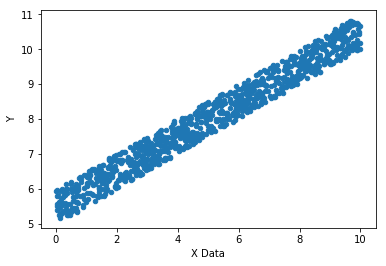

In [50]:
my_data.sample(n=1000).plot(kind='scatter',x='X Data', y='Y')

In [0]:
#create model to fit data 
batch_size = 8
m=tf.Variable(0.1)
b= tf.Variable(1.0)
init=tf.global_variables_initializer()

In [0]:
xph= tf.placeholder(tf.float32,[batch_size])
yph= tf.placeholder(tf.float32,[batch_size])

In [0]:
y_model = m* xph + b

In [0]:
error = tf.reduce_sum(tf.square(yph-y_model))
#(yph - y model)**2

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [0]:
train = optimizer.minimize(error)

In [0]:
with tf.Session() as sess:
  sess.run(init)
  batches = 528  #number of epoch
  for i in range(batches):
    #shuffle
    rand_ind= np.random.randint(len(x_data), size=batch_size)
    feed={xph:x_data[rand_ind], yph:y_true[rand_ind]}
    sess.run(train,feed_dict=feed)
  model_m, model_b = sess.run([m,b])
    
    

In [58]:
model_m , model_b

(0.60562927, 4.953194)

In [0]:
y_hat = x_data * model_m + model_b

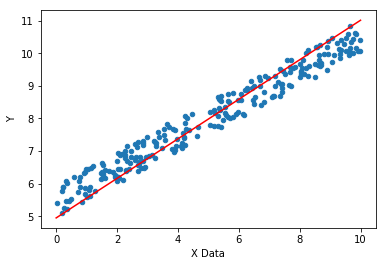

In [60]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y= 'Y')
plt.plot(x_data,y_hat,'r')

# Using tensorFlow Estimator 

In [0]:
feat_col = [tf.feature_column.numeric_column('x',shape=[1])]

In [62]:
estimator= tf.estimator.LinearRegressor(feature_columns=feat_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp90e6qf6h', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0b606d0630>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,
                                                      test_size=0.3,random_state=101 )

In [64]:
x_train.shape

(700000,)

In [0]:
input_fun = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4
                                                                 ,num_epochs=None, shuffle= True)

In [0]:
train_input_fun = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4
                                                                  ,num_epochs=1000, shuffle= False)

In [0]:
eval_input_fun = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=4
                                                                    ,num_epochs=1000, shuffle= False)

In [68]:
estimator.train(input_fn=input_fun, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp90e6qf6h/model.ckpt.
INFO:tensorflow:loss = 243.98813, step = 1
INFO:tensorflow:global_step/sec: 716.655
INFO:tensorflow:loss = 8.0394335, step = 101 (0.147 sec)
INFO:tensorflow:global_step/sec: 758.664
INFO:tensorflow:loss = 11.63283, step = 201 (0.131 sec)
INFO:tensorflow:global_step/sec: 854.042
INFO:tensorflow:loss = 4.9389505, step = 301 (0.114 sec)
INFO:tensorflow:global_step/sec: 868.186
INFO:tensorflow:loss = 9.387126, step = 401 (0.119 sec)
INFO:tensorflow:global_step/sec: 881.319
INFO:tensorflow:loss = 1.3709602, step = 501 (0.114 sec)
INFO:tensorflow:global_step/sec: 863.562
INFO:tensorflow:loss = 2.2963228, step = 601 (0.113 sec)
INFO:tensorflow:global_step/sec: 857.21
INFO:tensorflow:los

In [69]:
#evaluation
train_metrics = estimator.evaluate(input_fn=train_input_fun, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-24T01:09:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp90e6qf6h/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-05-24-01:09:13
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.22223668, global_step = 1000, label/mean = 8.00929, loss = 0.8889467, prediction/mean = 7.8310795
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10

In [70]:
eval_metrics = estimator.evaluate(input_fn=eval_input_fun, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-24T01:09:14Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp90e6qf6h/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-05-24-01:09:15
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.22758406, global_step = 1000, label/mean = 7.9788756, loss = 0.91033626, prediction/mean = 7.7909374
INFO:tensorflow:Saving 'checkpoint_path' summary for global step

In [0]:
eval_metrics

In [0]:
train_metrics

In [0]:
#prediction
input_pred=np.linspace(0,10,10)
input_fn_predict =  tf.estimator.inputs.numpy_input_fn({'x':input_pred},shuffle= False)

In [88]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp90e6qf6h/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.73858], dtype=float32)},
 {'predictions': array([5.421714], dtype=float32)},
 {'predictions': array([6.1048474], dtype=float32)},
 {'predictions': array([6.787981], dtype=float32)},
 {'predictions': array([7.471115], dtype=float32)},
 {'predictions': array([8.154248], dtype=float32)},
 {'predictions': array([8.837381], dtype=float32)},
 {'predictions': array([9.520515], dtype=float32)},
 {'predictions': array([10.2036495], dtype=float32)},
 {'predictions': array([10.886783], dtype=float32)}]

In [82]:
prediction = []
for x in estimator.predict(input_fn=input_fn_predict):
  prediction.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp90e6qf6h/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [92]:
input_pred,   prediction


(array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
         5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]),
 [array([4.73858], dtype=float32),
  array([5.421714], dtype=float32),
  array([6.1048474], dtype=float32),
  array([6.787981], dtype=float32),
  array([7.471115], dtype=float32),
  array([8.154248], dtype=float32),
  array([8.837381], dtype=float32),
  array([9.520515], dtype=float32),
  array([10.2036495], dtype=float32),
  array([10.886783], dtype=float32)])

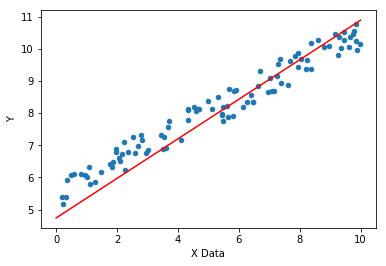

In [86]:
my_data.sample(n=100).plot(kind='scatter', x= 'X Data' , y= 'Y')
plt.plot(np.linspace(0,10,10),prediction,'r')